In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from radar import *

plt.style.use('ggplot')
%matplotlib inline

In [98]:
TOP50 = pd.read_csv('../../Paper/TOP50_Events/TOP50_events_Charlotte.csv', parse_dates=[0,1])

In [2]:
# Probability of exceedance
frequency={'count':[], '2':[], '10':[], '25':[], '50':[]}
months={4:'April', 5:'May', 6:'June', 7:'July',8:'August', 9:'September'}

for m in months.keys():
    for y in range(2001, 2016):
        t = pd.datetime(y, m, 4)
        c = Radar('charlotte', t, how='hdf5', make_rate=4)
        frequency['count'].append(np.sum(np.isfinite(c.box), axis=0))
        for thresh in [2, 10, 25, 50]:
            frequency[str(thresh)].append(np.sum(c.box>thresh, axis=0))

In [8]:
import cartopy.io.shapereader as shpreader

small_extent = [-81.035000-.01, -80.552222+.01, 35.019722-.01, 35.507778+.01]

fname = '../../data/CHARLOTTE/Maps/new_basin.shp'
basins = list(shpreader.Reader(fname).geometries())

fname = '../../data/CHARLOTTE/Maps/county.shp'
county = list(shpreader.Reader(fname).geometries())

cmap = plt.cm.get_cmap('jet', 10)
cmap.set_under(color='None')

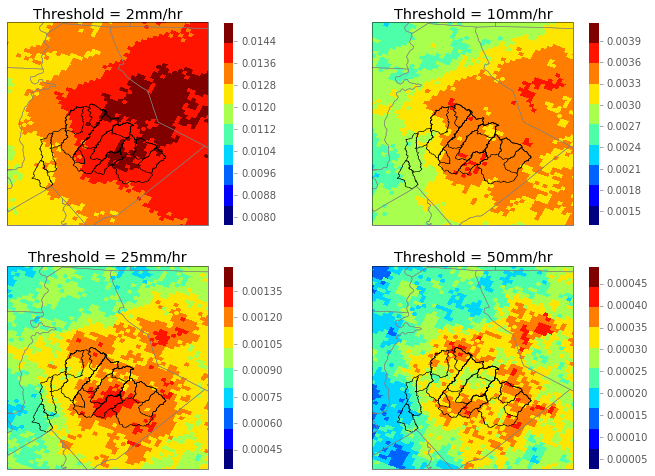

In [12]:
fig = plt.figure(figsize=(12,8))
for n, thresh in zip(range(4), ['2', '10', '25', '50']):
    ax = plt.subplot(2, 2, n+1, projection=ccrs.PlateCarree())
    ax.add_geometries(basins, ccrs.PlateCarree(), edgecolor='black', facecolor='None')
    ax.add_geometries(county, ccrs.PlateCarree(), edgecolor='gray', facecolor='None')
    ax.set_extent(small_extent, ccrs.PlateCarree())
    a = np.sum(frequency[thresh], axis=0)/np.sum(frequency['count'], axis=0).astype(float)
    scat = ax.pcolor(c.lon, c.lat, a, cmap=cmap)
    plt.colorbar(scat, ax=ax, fraction=0.05)
    ax.set_title('Threshold = {thresh}mm/hr'.format(thresh=thresh))
#plt.savefig('/home/jsignell/Paper/Notebooks/output/Frequency of rainfall above thresholds (large extent).png')

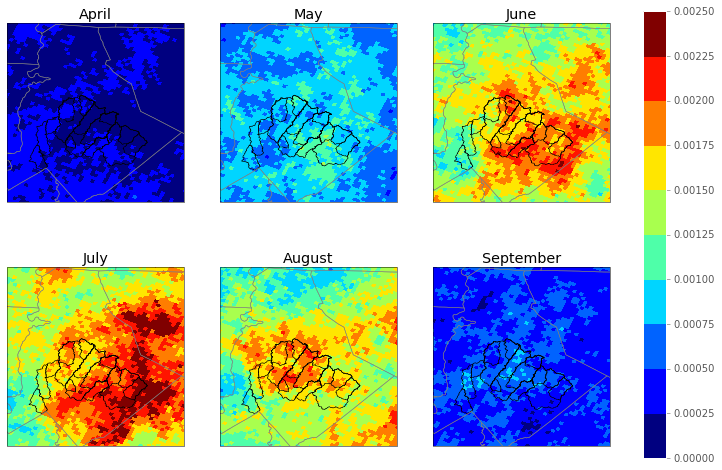

In [27]:
fig = plt.figure(figsize=(12,8))
axes = []
for n in range(6):
    ax = plt.subplot(2, 3, n+1, projection=ccrs.PlateCarree())
    ax.add_geometries(basins, ccrs.PlateCarree(), edgecolor='black', facecolor='None')
    ax.add_geometries(county, ccrs.PlateCarree(), edgecolor='gray', facecolor='None')
    ax.set_extent(small_extent, ccrs.PlateCarree())
    start = range(0,91,15)[n]
    end = range(0,91,15)[n+1]
    a = np.sum(frequency['25'][start:end], axis=0)/np.sum(frequency['count'][start:end], axis=0).astype(float)
    scat = ax.pcolor(c.lon, c.lat, a, cmap=cmap, vmin=0, vmax=0.0025)
    axes.append(ax)
    #plt.colorbar(scat, ax=ax, fraction=0.05)
    ax.set_title(months[n+4])
plt.colorbar(scat, ax=axes, fraction=0.05)
plt.savefig('/home/jsignell/Paper/Notebooks/output/Month frequency of rainfall above 25mm hr-1 (small extent).png')

This next cell takes about an hour and a half to run

In [ ]:
# Peak time of exceedance
peak_time={2:{4:np.zeros([96,140,140], dtype=np.int32), 
              5:np.zeros([96,140,140], dtype=np.int32),
              6:np.zeros([96,140,140], dtype=np.int32),
              7:np.zeros([96,140,140], dtype=np.int32),
              8:np.zeros([96,140,140], dtype=np.int32),
              9:np.zeros([96,140,140], dtype=np.int32)},
           10:{4:np.zeros([96,140,140], dtype=np.int32), 
               5:np.zeros([96,140,140], dtype=np.int32),
               6:np.zeros([96,140,140], dtype=np.int32),
               7:np.zeros([96,140,140], dtype=np.int32),
               8:np.zeros([96,140,140], dtype=np.int32),
               9:np.zeros([96,140,140], dtype=np.int32)},
           25:{4:np.zeros([96,140,140], dtype=np.int32), 
               5:np.zeros([96,140,140], dtype=np.int32),
               6:np.zeros([96,140,140], dtype=np.int32),
               7:np.zeros([96,140,140], dtype=np.int32),
               8:np.zeros([96,140,140], dtype=np.int32),
               9:np.zeros([96,140,140], dtype=np.int32)},
           50:{4:np.zeros([96,140,140], dtype=np.int32), 
               5:np.zeros([96,140,140], dtype=np.int32),
               6:np.zeros([96,140,140], dtype=np.int32),
               7:np.zeros([96,140,140], dtype=np.int32),
               8:np.zeros([96,140,140], dtype=np.int32),
               9:np.zeros([96,140,140], dtype=np.int32)}}

months={4:'April', 5:'May', 6:'June', 7:'July',8:'August', 9:'September'}

for m in months.keys():
    for y in range(2001, 2016):
        t = pd.datetime(y, m, 4)
        c = Radar('charlotte', t, how='hdf5', make_rate=4)
        for thresh in [2, 10, 25, 50]:
            b = c.box>thresh
            for ix in range(0,140):
                for iy in range(0,140):
                    q = c.time[b[:,iy,ix]].hour*60+c.time[b[:,iy,ix]].minute
                    for i, t in enumerate(range(0, 60*24, 15)):
                        peak_time[thresh][m][i,iy,ix]+=np.sum(q==t)
#dset = f.create_dataset("peak_time_2", data=peak_time['2'])

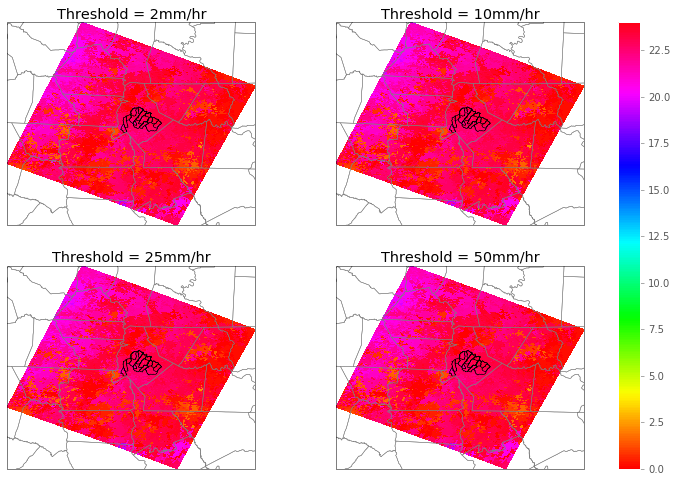

In [210]:
fig = plt.figure(figsize=(12,8))
axes = []
for n, thresh in zip(range(4), ['2', '10', '25', '50']):
    ax = plt.subplot(2, 2, n+1, projection=ccrs.PlateCarree())
    ax.add_geometries(basins, ccrs.PlateCarree(), edgecolor='black', facecolor='None')
    ax.add_geometries(county, ccrs.PlateCarree(), edgecolor='gray', facecolor='None')
    #ax.set_extent(small_extent, ccrs.PlateCarree())
    scat = ax.pcolor(c.lon, c.lat, peak_time[thresh].argmax(axis=0)/4., cmap='hsv', vmin=0, vmax=24)
    axes.append(ax)
    ax.set_title('Threshold = {thresh}mm/hr'.format(thresh=thresh))
plt.colorbar(scat, ax=axes, fraction=0.05)

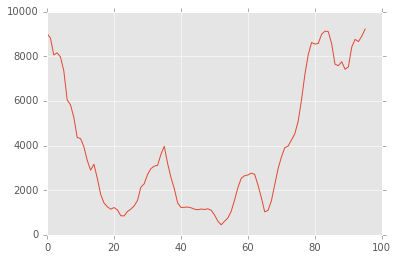

In [142]:
plt.plot(np.sum(a, axis=(1,2)))

In [78]:
f =c.time[b[:,0,0]].hour*60+c.time[b[:,0,0]].minute

In [79]:
type(f)

numpy.ndarray

In [80]:
f.size

21

In [81]:
24*4

96